# 11 - Distance Manipulation and Analysis:

### In this tutorial we will learn about bond distance manipulation, calculation and visualization routines within Architector.

**(A)** Generating with fixed metal-ligand bond lengths in an Iron Hexa-aqua complex.

**(B)** Visualizing tricks for bond lengths.

**(C)** Tabulating and plotting bond lengths.

## Starting from **(A)**: 
Importing necessary functions!

Let's build a reference set of Fe-Hexa-Aqua Structures

In [1]:
from architector import (build_complex,
                        view_structures,
                        convert_io_molecule)
import architector.io_ptable as io_ptable # Contains ligand references

In [2]:
inputDict = {'core':{'metal':'Fe','coreCN':6}, #Specify metal coordination number (CN)
            'ligands':['water']*6, # Specify what is filling the coordination environment
            'parameters':{}} # No additional parameters needed for default
fe_h2o_6_out = build_complex(inputDict) # Now just build using the dictionary!

In [3]:
# Now, we can visualize interatomic distances
view_structures(fe_h2o_6_out,vis_distances=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Now, we can create elonged metal-ligand distances by specifying our own ligand definition

In [4]:
stretch_water_lig = io_ptable.ligands_dict['water'].copy()
stretch_water_lig

{'smiles': 'O', 'coordList': [0], 'ligType': 'mono'}

In [5]:
# Now, we can add metal-distance constraints 
# These take the form {coordinatng_atom_index:distance}
stretch_water_lig['ca_metal_dist_constraints'] = {0:2.6}

In [6]:
# Now, we can build with 2 ligands stretched!
inputDict2 = {'core':{'metal':'Fe','coreCN':6}, #Specify metal coordination number (CN)
            'ligands':['water']*4+[stretch_water_lig]*2, # Specify what is filling the coordination environment
            'parameters':{'relax':True,'return_full_complex_class':True}} # No additional parameters needed for default
fe_h2o_6_out2 = build_complex(inputDict2) # Now just build using the dictionary!

In [7]:
# Note that 2 waters are now fixed at ~2.58 Angstroms while the rest have different bond lengths from above!
view_structures(fe_h2o_6_out2, vis_distances=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Beyond bond lengths shown in (A), we can see more diverse visualizations in **(B)**

First, we will get the last molecule from (A):

In [8]:
example_mol = convert_io_molecule(fe_h2o_6_out2[list(fe_h2o_6_out2.keys())[0]]['mol2string'])
view_structures(example_mol,labelinds=True) # Start by labeling indices

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
view_structures(example_mol,
                vis_distances = True, # For vis_distances=True, the metal(s) in a system are selected for calculation.
                distradius=4, # By Specifying distradius, it will show all bonds within a cutoff of the requested atom
                ) 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

This looks very crowded! How can we see these individual distances better.

In [10]:
view_structures(example_mol,
                vis_distances = True, # For vis_distances=True, the metal(s) in a system are selected for calculation.
                distradius=4, # By Specifying distradius, it will show all bonds within a cutoff of the requested atom
                distvisradius=0.1, # distvisradius makes the bond visualization smaller
                distlabelposit=0.9, # distlabelposit shifts the labels a fraction of the bond length (1 closer to end atom, 0 closer to start atom)
                distopacity=1, # distopacity shows how transparent/dark the bonds are drawn
                labelsize=9, # labelsize changes the text size
                representation='sphere', # Will only show spheres instead of bonds.
                ) 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Looks better, but can we only do metal-ligand distances? No!

In [11]:
view_structures(example_mol,
                vis_distances = 1, # For vis_distances=int, the atom with index of int is used as the center for plotting distances.
                distradius=4, # By Specifying distradius, it will show all bonds within a cutoff of the requested atom
                distvisradius=0.1, # distvisradius makes the bond visualization smaller
                distlabelposit=0.9, # distlabelposit shifts the labels a fraction of the bond length (1 closer to end atom, 0 closer to start atom)
                distopacity=1, # distopacity shows how transparent/dark the bonds are drawn
                labelsize=9, # labelsize changes the text size
                representation='sphere', # Will only show spheres instead of bonds.
                ) 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
view_structures(example_mol,
                vis_distances = [1,4], # For vis_distances=list, the atoms with indices of the center(s) are used for plotting distances.
                distradius=4, # By Specifying distradius, it will show all bonds within a cutoff of the requested atom
                distvisradius=0.1, # distvisradius makes the bond visualization smaller
                distlabelposit=0.9, # distlabelposit shifts the labels a fraction of the bond length (1 closer to end atom, 0 closer to start atom)
                distopacity=1, # distopacity shows how transparent/dark the bonds are drawn
                labelsize=9, # labelsize changes the text size
                representation='sphere', # Will only show spheres instead of bonds.
                ) 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

This looks better, and interesting, but distinguishing these can be tricky! Let's do just one more tweak.

In [13]:
view_structures(example_mol,
                vis_distances = [1,4], # For vis_distances=list, the atoms with indices of the center(s) are used for plotting distances.
                distradius=4, # By Specifying distradius, it will show all bonds within a cutoff of the requested atom
                distvisradius=0.1, # distvisradius makes the bond visualization smaller
                distlabelposit=0.9, # distlabelposit shifts the labels a fraction of the bond length (1 closer to end atom, 0 closer to start atom)
                distopacity=1, # distopacity shows how transparent/dark the bonds are drawn
                distcolor=['red','blue'], # If a list of color labels is passed, they can be manually changed to represent the indices selected in the vis_distances list!
                labelsize=9, # labelsize changes the text size
                representation='sphere', # Will only show spheres instead of bonds.
                ) 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Beyond visualizations in (B), we may want to simply plot or tabulate the bond distances.
## This leads us to **(C)**:

Here, we can immediately obtain the bond distances in a table with one call from Architector!

In [14]:
df = example_mol.get_lig_dists()
df

,atom_pair,bond_type,smiles,smiles_index,distance,sum_cov_radii,atom_symbols
0,"(0, 1)",explicit_bond,O,0,2.584900,1.79,Fe-O
1,"(0, 4)",explicit_bond,O,0,2.584900,1.79,Fe-O
2,"(0, 7)",explicit_bond,O,0,2.405006,1.79,Fe-O
3,"(0, 10)",explicit_bond,O,0,2.405006,1.79,Fe-O
4,"(0, 13)",explicit_bond,O,0,2.402900,1.79,Fe-O
5,"(0, 16)",explicit_bond,O,0,2.402800,1.79,Fe-O


Note that the atom_pair corresponds to the distances, and all ofhter information including the sum of covalent radii in angstroms are included in the table.

Further, note that for ligands, both the smiles string AND the index of the atom in the smiles string are computed.

We might be more interested in longer distances as before and not use the metal as the index.

In [15]:
df = example_mol.get_lig_dists(radius=4,ref_ind=2)
df

,atom_pair,bond_type,smiles,smiles_index,distance,sum_cov_radii,atom_symbols
0,"(2, 1)",explicit_bond,O,0.0,0.960857,0.95,H-O
1,"(2, 0)",implicit_bond,None,NaN,3.250759,1.48,H-Fe
2,"(2, 3)",implicit_bond,O,2.0,1.543559,0.64,H-H
3,"(2, 10)",implicit_bond,O,0.0,3.629175,0.95,H-O
4,"(2, 13)",implicit_bond,O,0.0,3.790972,0.95,H-O
5,"(2, 15)",implicit_bond,O,2.0,3.987336,0.64,H-H


Note that the bond_type and atom_symbols for the Fe-H bonds have been flagged as "implicit_bonds". Because they were not included in the graph.

Now, pandas/matplotlib can be used to generate nice plots illustrating the distance distributions!

Text(0.5, 1.0, 'Distance Plot')

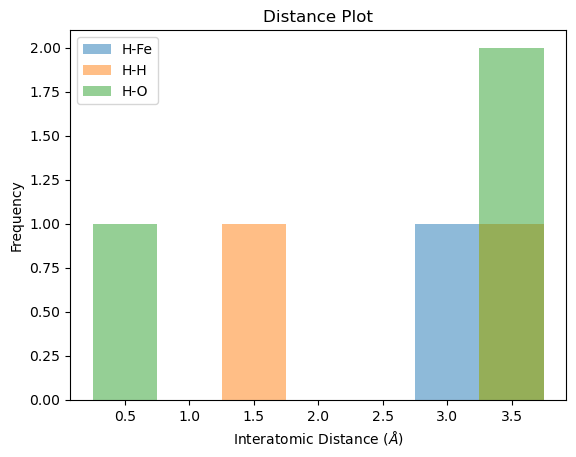

In [16]:
import matplotlib.pyplot as plt
import numpy as np
g = df.groupby('atom_symbols')['distance']
axes = g.plot(kind='hist',bins=np.arange(0.5,4.5,0.5),alpha=0.5,align='left')
for i, (groupname, group) in enumerate(g):
    axes[i].set_label(groupname)
plt.legend()
plt.xlabel('Interatomic Distance ($\AA$)')
plt.title('Distance Plot')

Note, if you want to save/export the data simply execute:

`df.to_csv('example.csv',index=False)`

## Summary

### In this tutorial we learned about bond distance manipulation, calculation and visualization routines within Architector in 3 example sections:

**(A)** Generated  Iron Hexa-aqua complexes with fixed metal-ligand bond lengths.

**(B)** Visualized bond distances with in-build routine.

**(C)** Tabulated and plotted bond lengths.